# Проект: Обучение с учителем: качество модели

**Описание исследования**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

**Цель исследования**

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задачи исследования**

+ Промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

+ Собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

**Исходные данные**

`market_file.csv`  - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


`market_money.csv` - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.


`market_time.csv` - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время. минут — значение времени, проведённого на сайте, в минутах.


`money.csv` - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

### Импорт библиотек, загрузка, чтение данных

In [1]:
pip install -q scikit-learn==1.1.3

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip uninstall numpy -y -q
!pip install numpy==1.22.4 -q
!pip install shap -q
!pip install phik -q
!pip install --upgrade numba contourpy -q
!pip install --upgrade seaborn matplotlib phik -q

#ИЛИ
# !pip install -r requirements.txt
# при необходимости можно запустить данную команду, для установки версий библиотек,
#которые использовались при использовании данного проекта
# и с которыми не возникали конфликты

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
from scipy import stats    

from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV,
                                     GridSearchCV
                                    )
from sklearn.preprocessing import (StandardScaler, 
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   MinMaxScaler
                                  )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score,
                             f1_score
                            )
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import phik
import shap


In [5]:
# Проведем импорт констант
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [6]:
try:
    market_file = pd.read_csv('/datasets/market_file.csv')
except:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
    
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [7]:
try:
    market_money = pd.read_csv('/datasets/market_money.csv')
except:
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [8]:
try:
    market_time = pd.read_csv('/datasets/market_time.csv')
except:
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
    
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [9]:
try:
    money = pd.read_csv('/datasets/money.csv'б sep=';', decimal=",")
except:
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=",")
    
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### Изучение данных

#### Датасет market_file

In [10]:
#Просмотр информации о датасете market_file и описательной статистики файла
market_file.info()
market_file.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Пропусков в данном датасете нет. Названия некоторых столбцов содержат пробелы, поэтому название этих столбцов приведем к правилам змеиного регистра в последующих шагах, названия столбцов оставим на кириллице, так как в рамках проекта это допускается

Тип данных столбцов Маркет_актив_6_мес и Акционные_покупки не соответствует, также исправим в последующих шагах.

#### Датасет market_money

In [11]:
#Просмотр информации о датасете market_money и описательной статистики файла
market_money.info()
market_money.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Пропусков в данном датасете нет. Названия столбцов оставим на кириллице, так как в рамках проекта это допускается.

Тип данных столбца Выручка не соответствует, также исправим в последующих шагах.
Есть записи с выручной 0 и с выручкой более 100 000. Возможно, это какие-то ошибки, проверим на следующих шагах исследования.

#### Датасет market_time

In [12]:
market_time.info()
market_time.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Пропуски отсутствуют, типы данных столбцов совпадают и не требуют переименования (только сменим регистр)

#### Датасет money

In [13]:
money.info()
money.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


Явные пропуски отстутствуют, типы данных соответствуют. Возможно, присутствуют подозрительные значения прибыли. Рассмотрим данный вопрос в следующих шагах исследования

**Вывод по изучению данных**: Было обработано 4 датасета. Все столбцы датасета соответствуют описанию в  начале проекта. 
В датасетах market_file, market_money был изменен тип данных, так как он не соответствовал имеющимся в нем данным.
И в датасетах money и market_money имеются подозрительные значения, выявленные в процессе описательной статистики. Проверим далее.

### Предобработка данных

In [14]:
#Определим функцию, которая будет приводить их к змеиному регистру
def columns_remove_spaces(df):
    df.columns = df.columns.str.replace(' ', '_').str.lower()

In [15]:
columns_remove_spaces(market_file)
columns_remove_spaces(market_money)
columns_remove_spaces(market_time)
columns_remove_spaces(money)

In [16]:
print (market_file.columns)
print (market_money.columns)
print (market_time.columns)
print (money.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


В процессе исследования была определена функция, которая привела все названия столбцов к змеиному регистру. названия оставили на кириллице, так как это допускается в рамках проекта.

In [17]:
# Определим функцию, которая будетт менять тип данных object на float64, как это требуют некоторые столбцы
def object_to_float(df, columns):
    for col in columns:
        df[col] = df[col].astype('float64')

In [18]:
object_to_float(market_file, ['маркет_актив_6_мес', 'акционные_покупки'])

In [19]:
#Проверили, верно ли функция выполнилась
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

Проверим наличие дубликатов в датасетах.


In [20]:
print('Число дублей в датафрейме market_file', market_file.duplicated().sum())

Число дублей в датафрейме market_file 0


In [21]:
print('Число дублей в датафрейме market_money', market_money.duplicated().sum())

Число дублей в датафрейме market_money 0


In [22]:
print('Число дублей в датафрейме market_time', market_time.duplicated().sum())

Число дублей в датафрейме market_time 0


In [23]:
print('Число дублей в датафрейме money', money.duplicated().sum())

Число дублей в датафрейме money 0


Явных дубликатов нет в датасетах, проверим наличие неявных дубликатов:


In [24]:
dataframes = [market_file, market_money, market_time, money]

In [25]:
# Выявление уникальных значений категориальных столбцов
for df in dataframes:
    for column in df.select_dtypes(include=['object']).columns:
        print(f'Уникальные значения для {column}:')
        print(df[column].unique())

Уникальные значения для покупательская_активность:
['Снизилась' 'Прежний уровень']
Уникальные значения для тип_сервиса:
['премиум' 'стандартт' 'стандарт']
Уникальные значения для разрешить_сообщать:
['да' 'нет']
Уникальные значения для популярная_категория:
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Уникальные значения для период:
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
Уникальные значения для период:
['текущий_месяц' 'предыдцщий_месяц']


В типе сервиса выявлен неявный дубликат - опечатка

И также выявлена опечатка в столбце Период.

Исправим это в следующем шаге:

In [26]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

Также считают важным проверить неявные пропуски тоже, хоть и явные пропуски отсутствуют.


In [27]:
#Определим функцию, которая будет проверять неявные пропуски
def check_string_nan_values(df, columns):
    columns_with_nan = {}
    for col in columns:    
        na_count = df[(df[col].str.lower().isin(['', ' ', 'none', 'nan']))][col].count()
        if na_count > 0:
            columns_with_nan[col] = na_count

    return columns_with_nan

In [28]:
cols = check_string_nan_values(market_file, market_file.select_dtypes(include=['object']).columns.to_list())
print('Список столбцов market_file с пустыми значениями', cols)

cols = check_string_nan_values(market_money, market_money.select_dtypes(include=['object']).columns.to_list())
print('Список столбцовmarket_money с пустыми значениями', cols)

cols = check_string_nan_values(market_time, market_time.select_dtypes(include=['object']).columns.to_list())
print('Список столбцов market_time с пустыми значениями', cols)

Список столбцов market_file с пустыми значениями {}
Список столбцовmarket_money с пустыми значениями {}
Список столбцов market_time с пустыми значениями {}


Неявные пропуски в датасетах отстутсвуют

**Вывод по предобработке данных**:

 + так как некоторые столбцы содержали пробелы и не соответствовали правилам змеиного регистра, то была определена функция, которая привела к нему все столбцы, было принято решение оставить названия на кириллице, так как столбцов много и в проекте это было допустимо
 
 + изменили тип данных в датасете market_file там, где это было нужно (также определив функцию)
 
 + обработали пропуски (проверили явные и неявные: пропуски отстутствуют в датасете),
 
 + обработали дубликаты (в датасетах отстутствуют явные дубликаты, однако в датасете market_file выявлен неявный дубликат, который образовался в результате опечатки, исправили его), в датасете market_time обнаружили опечатку, которую исправили
 
 Можем переходить к исследовательскому анализу.

### Исследовательский анализ данных

Чтобы облегчить построение графиков, диаграмм, определим функции, которые будут строить для нас граифик с учетом вводных данных:


In [29]:
def histogram(df, col, target):
    plt.figure(figsize=(8,6))
    plot = sns.histplot(df, bins=20, kde=True, hue=target, x=col, stat='density', common_norm=False)
    plot.set_title(f'Распределение по {col}', fontsize=16)
    plot.set_ylabel('Плотность распределения', fontsize=14)

    plot.legend(title=f'{target}')
    plt.tight_layout()
    plt.show()
        
def categoral_unique(df, col):
    display(df[col].unique())
    custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'] 
    plt.figure(figsize=(8,6))
    plot = sns.countplot(y=col, data=df, palette=custom_palette)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_xlabel('Количество', fontsize=14)


def categorical_unique_a(df, col, target):
    print(df[col].unique())
    palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'] 
    plot = sns.countplot(x=col, hue=target, data=df, palette=palette)
    plot.set_title(f'Распределение по {col}', fontsize=16)
    plot.set_xlabel(f'{col} (Количество)', fontsize=14)
    plot.set_ylabel('Количество наблюдений', fontsize=14)
    plot.legend(title=f'{target}', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def hist_with_wiskers(df, col, target, bins=20):
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(f'Гистограмма для {col}', fontsize=16)
    axes[0].set_ylabel('Количество', fontsize=14)
    
    if target is not None:
        sns.histplot(df, bins=bins, kde=True, ax=axes[0], hue=target, x=col, palette='Greens')
    else:
        sns.histplot(df, bins=bins, kde=True, ax=axes[0], x=col, color='red')
    
    # График ящик с усами
    axes[1].set_title(f'График ящик с усами для {col}', fontsize=16)
    sns.boxplot(data=df, ax=axes[1], y=col, palette='Blues')
    axes[1].set_ylabel(col, fontsize=14)
    plt.show()

def pivot_bar_plot(df, col):
    plt.figure(figsize=(8,6))
    custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
    plot = sns.barplot(x=col, data=df, y=df.index, palette = custom_palette)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_xlabel('Количество', fontsize=14)

#### Датасет market_file

array(['Снизилась', 'Прежний уровень'], dtype=object)

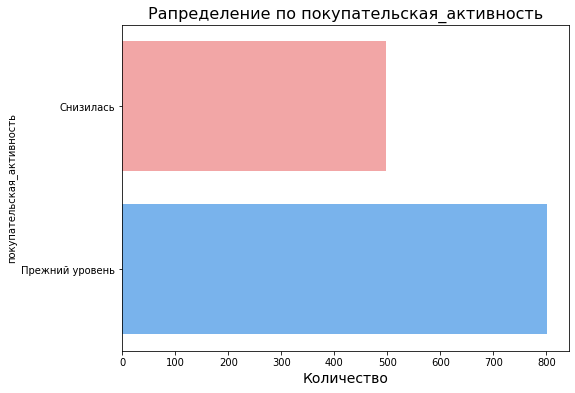

In [30]:
categoral_unique(market_file, 'покупательская_активность')

Если говорить о дисбалансе значений целевого признака, то видно, что он присутствует. Прежний уровень преобладает над значением снизилась. 
Это может привести к тому, что обученная модель может ошибочно из-за такой статистики присвоить "Прежний уровень", там где должен быть "Снизилась", будут смещаться метрики. 

array(['премиум', 'стандарт'], dtype=object)

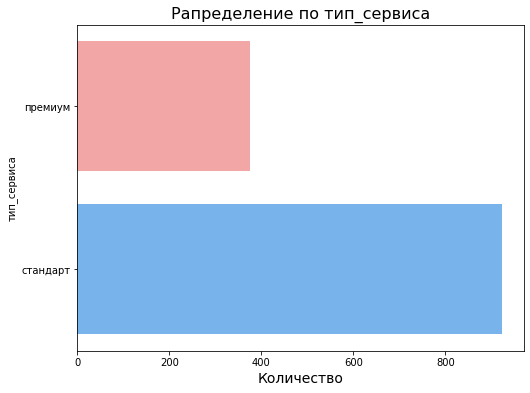

In [31]:
categoral_unique(market_file, 'тип_сервиса')

Видим, что премиум пользователей меньше, что обычно и наблюдается.

array(['да', 'нет'], dtype=object)

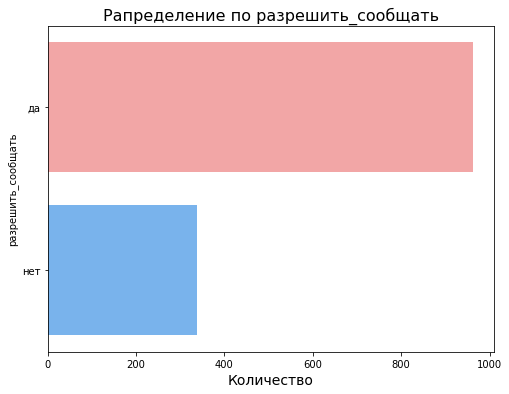

In [32]:
categoral_unique(market_file, 'разрешить_сообщать')

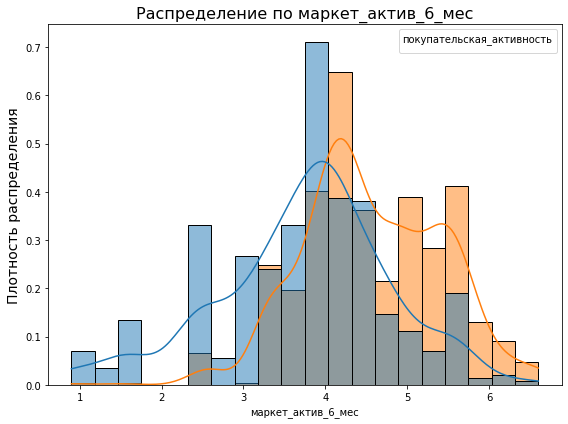

In [33]:
histogram(market_file, 'маркет_актив_6_мес', 'покупательская_активность')

In [34]:
market_file.query('маркет_актив_6_мес < 2')

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
30,215378,Снизилась,стандарт,да,1.7,3,488,0.39,Техника для красоты и здоровья,5,1,4,3
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7
38,215386,Снизилась,стандарт,да,1.5,3,495,0.98,Домашний текстиль,2,3,7,5
47,215395,Снизилась,премиум,да,1.5,5,645,0.27,Товары для детей,3,3,6,5
55,215403,Снизилась,премиум,да,1.7,5,771,0.39,Техника для красоты и здоровья,1,8,2,5
61,215409,Снизилась,премиум,да,1.4,4,857,0.95,Кухонная посуда,3,4,5,5
63,215411,Снизилась,стандарт,да,1.7,4,756,0.33,Товары для детей,2,3,7,4
70,215418,Снизилась,стандарт,нет,1.7,4,472,0.94,Домашний текстиль,2,6,4,3
81,215429,Снизилась,премиум,нет,0.9,4,690,0.24,Домашний текстиль,2,5,7,4
108,215456,Снизилась,стандарт,да,1.7,4,449,0.23,Косметика и аксесуары,3,4,4,5


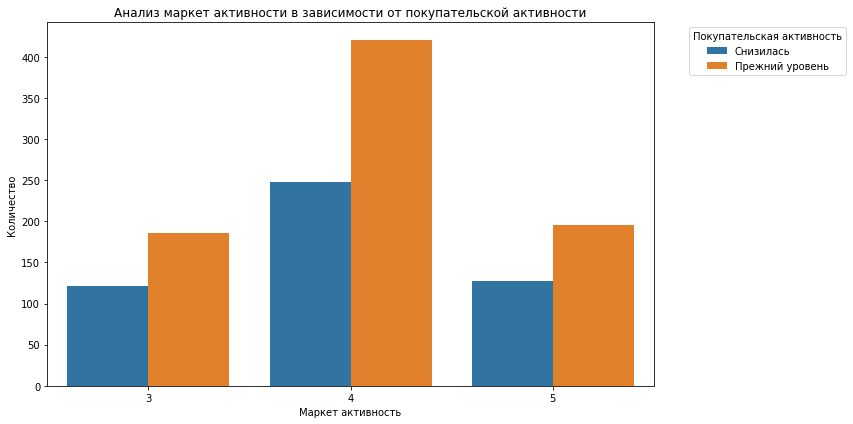

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='маркет_актив_тек_мес', hue='покупательская_активность', data=market_file)

# Наименовываем оси и добавляем заголовок
plt.title('Анализ маркет активности в зависимости от покупательской активности')
plt.xlabel('Маркет активность')
plt.ylabel('Количество')
plt.legend(title='Покупательская активность', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

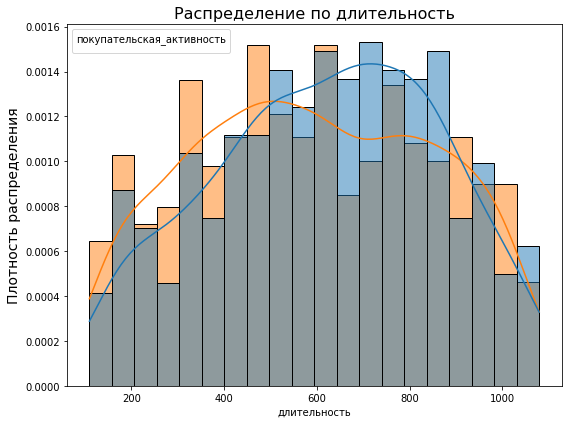

In [36]:
#hist_with_wiskers(market_file, 'длительность', 'покупательская_активность', bins=20)
histogram(market_file, 'длительность', 'покупательская_активность')


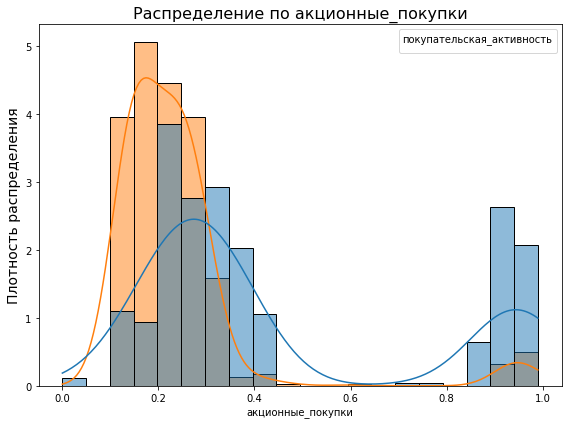

In [37]:
histogram(market_file, 'акционные_покупки', 'покупательская_активность')

На основании данной гистограммы можно предположить, что для большинства покупателей не совсем принципиально покупать что-то в акционные дни. Это может нас натолкнуть на то, что по данному признаку мы можем сегментировать пользователей сайта.  Но тем не менее есть часть покупателей, которые отслеживают акционные дни и приобретают товары по скидке. Между этими столбцами есть промежуток, из этого следует, что мы можем разделить покупателей по этому принципу - создать категориальный признак - акционные покупки при подготовке модели.


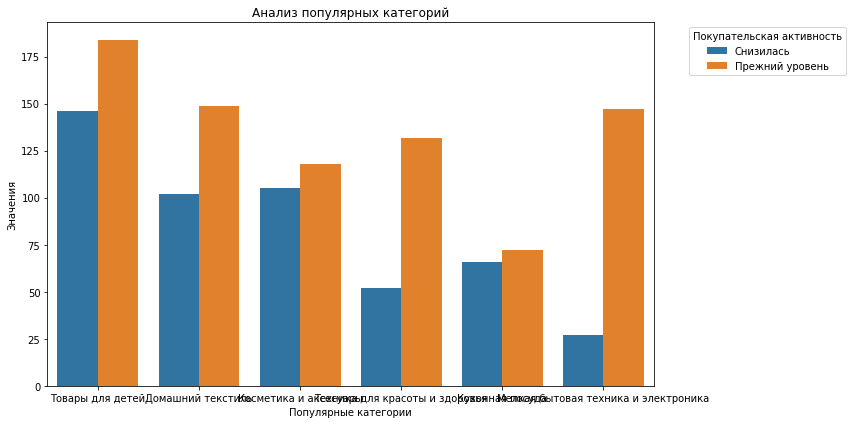

In [38]:
#categoral_unique(market_file, 'популярная_категория') 
plt.figure(figsize=(12, 6))
sns.countplot(x='популярная_категория', hue='покупательская_активность', data=market_file)

# Наименовываем оси и добавляем заголовок
plt.title('Анализ популярных категорий')
plt.xlabel('Популярные категории')
plt.ylabel('Значения')
plt.legend(title='Покупательская активность', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

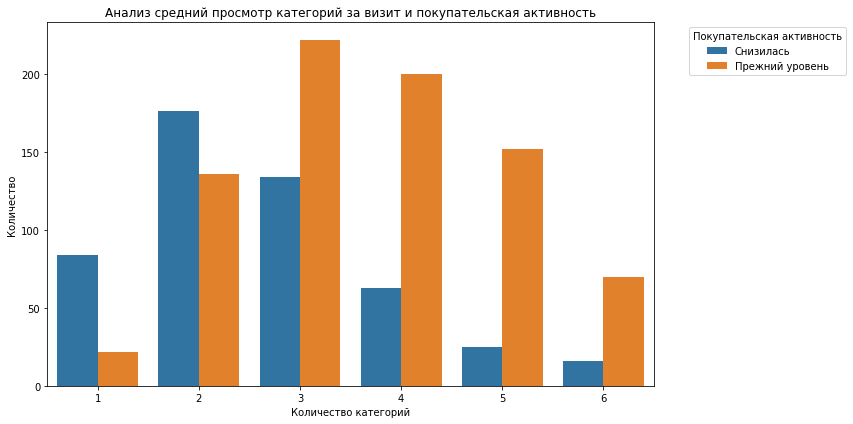

In [39]:
#hist_with_wiskers(market_file, 'средний_просмотр_категорий_за_визит', 'покупательская_активность', bins=20)
plt.figure(figsize=(12, 6))
sns.countplot(x='средний_просмотр_категорий_за_визит', hue='покупательская_активность', data=market_file)

# Наименовываем оси и добавляем заголовок
plt.title('Анализ средний просмотр категорий за визит и покупательская активность')
plt.xlabel('Количество категорий')
plt.ylabel('Количество')
plt.legend(title='Покупательская активность', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Выбросов не наблюдается

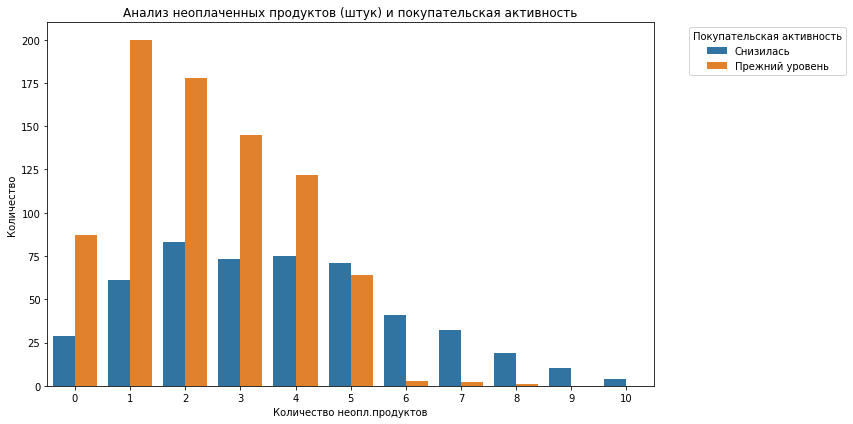

In [40]:
#hist_with_wiskers(market_file, 'неоплаченные_продукты_штук_квартал', 'покупательская_активность', bins=20)
plt.figure(figsize=(12, 6))
sns.countplot(x='неоплаченные_продукты_штук_квартал', hue='покупательская_активность', data=market_file)

# Наименовываем оси и добавляем заголовок
plt.title('Анализ неоплаченных продуктов (штук) и покупательская активность')
plt.xlabel('Количество неопл.продуктов')
plt.ylabel('Количество')
plt.legend(title='Покупательская активность', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

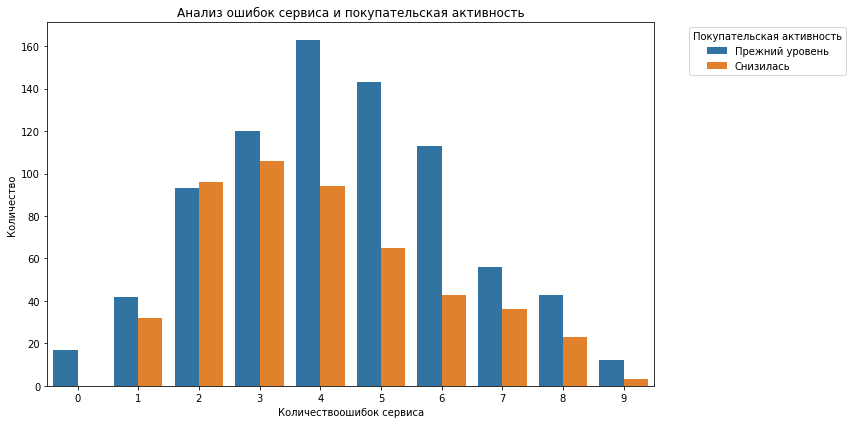

In [41]:
#hist_with_wiskers(market_file, 'ошибка_сервиса', 'покупательская_активность', bins=20)
plt.figure(figsize=(12, 6))
sns.countplot(x='ошибка_сервиса', hue='покупательская_активность', data=market_file)

# Наименовываем оси и добавляем заголовок
plt.title('Анализ ошибок сервиса и покупательская активность')
plt.xlabel('Количествоошибок сервиса')
plt.ylabel('Количество')
plt.legend(title='Покупательская активность', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

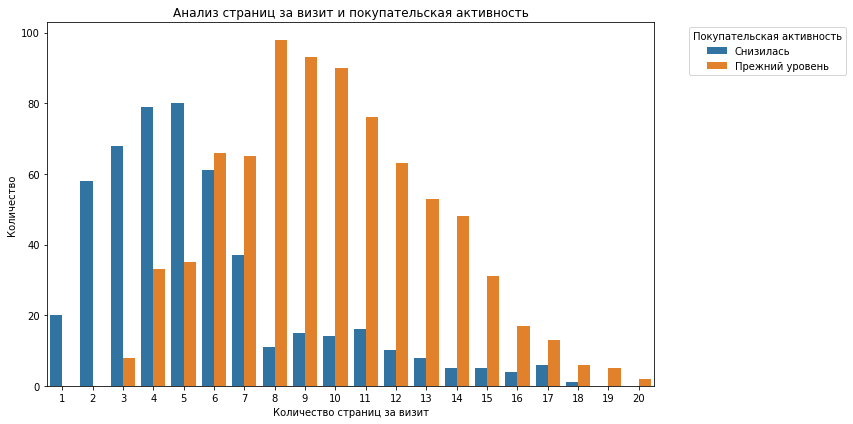

In [42]:
#hist_with_wiskers(market_file, 'страниц_за_визит', 'покупательская_активность', bins=20)
plt.figure(figsize=(12, 6))
sns.countplot(x='страниц_за_визит', hue='покупательская_активность', data=market_file)

# Наименовываем оси и добавляем заголовок
plt.title('Анализ страниц за визит и покупательская активность')
plt.xlabel('Количество страниц за визит')
plt.ylabel('Количество')
plt.legend(title='Покупательская активность', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Также нет выбросов. Можно сопоставить результаты просмотра гистограмм с описательной статистикой.

#### Датасет market_money

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

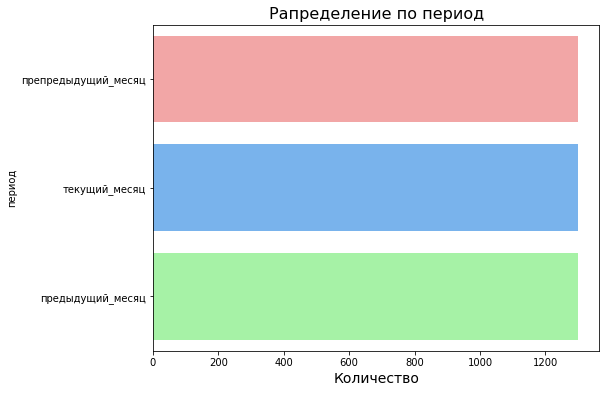

In [43]:
categoral_unique(market_money, 'период') 

In [44]:
#Посчитаем суммарную выручку за каждый месяц, создав сводную таблицу
market_money_period = market_money.pivot_table(index='период', values=['выручка'], aggfunc='sum')
market_money_period

,выручка
период,
предыдущий_месяц,6417996.5
препредыдущий_месяц,6272769.0
текущий_месяц,6909449.1


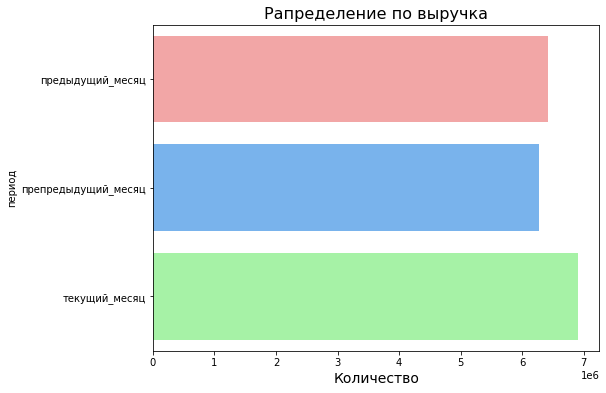

In [45]:
#Посмотрим выручку наглядно

pivot_bar_plot(market_money_period, 'выручка') 

Показатели выручки за три месяца не сильно отличаются друг от друга.

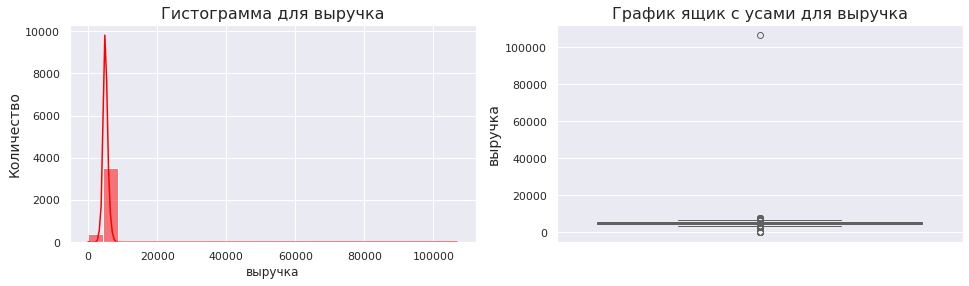

In [46]:
hist_with_wiskers(market_money, 'выручка', None, bins = 25)

In [47]:
market_money.query('выручка > 100000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


В этом признаке есть аномальное значение, которое мы исключим, поскольку оно может повлиять на корректность анализа данных. Это может быть следствием человеческого фактора или иных ошибок. В любом случае, если не обработать эти значения должным образом, они могут снизить точность модели.

In [48]:
market_money = market_money[market_money['выручка'] < 100000]

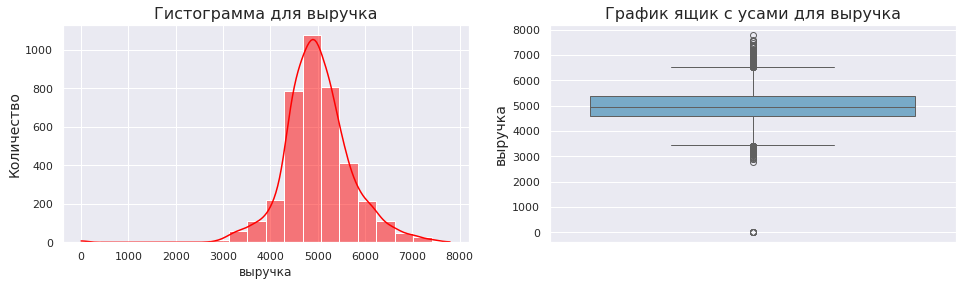

In [49]:
hist_with_wiskers(market_money, 'выручка', None, bins=20)

Теперь гистограмма и ящик с усами выглядят более наглядно.

In [50]:
market_money.query('выручка < 1')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


У нас имеются пользователи, которые ничего не покупали и не проявляли активности на сервисе. Думаю, нам следует избавиться от данных значений.

In [51]:
market_money = market_money[market_money['выручка'] > 0]

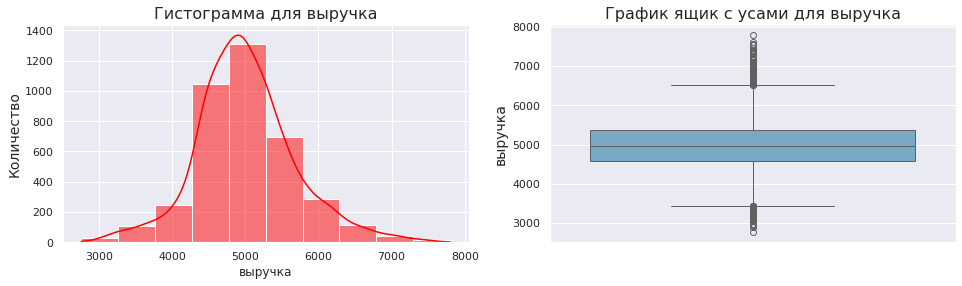

In [52]:
hist_with_wiskers(market_money, 'выручка', None, bins=10)

#### Датасет market_time

In [53]:
#Посчитаем суммарную время за каждый месяц, создав сводную таблицу
market_time_period = market_time.pivot_table(index='период', values=['минут'], aggfunc='sum')
market_time_period

,минут
период,
предыдущий_месяц,17508
текущий_месяц,17166


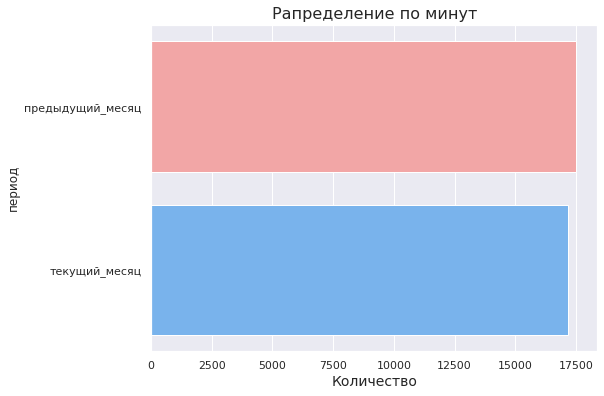

In [54]:
pivot_bar_plot(market_time_period, 'минут') 

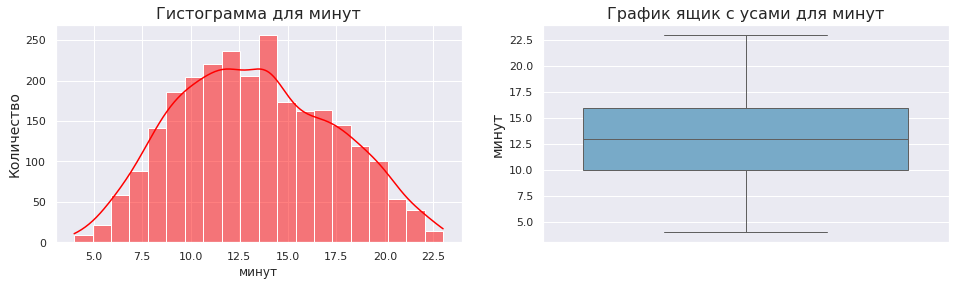

In [55]:
hist_with_wiskers(market_time, 'минут', None, bins=20)

По минутам всё выглядит нормально, выбросов нет, в принципе как и было в описательной статистике.

#### Датасет money

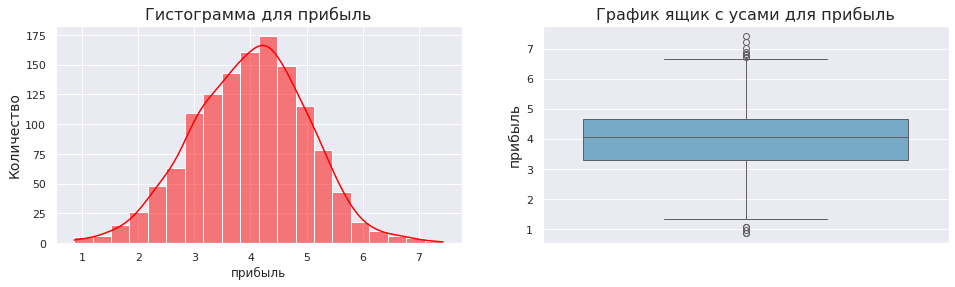

In [56]:
hist_with_wiskers(money, 'прибыль', None, bins=20)

В принципе гистограммы выглядят нормально, будто без выбросов.

#### Следующий шаг
 Отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [57]:
agg_dict = {'период': ['count']}
grouped = market_money.groupby('id').agg(agg_dict)
grouped.columns = ['count']

grouped = grouped[grouped['count'] == 3]
market_file = market_file[market_file['id'].isin(grouped.index)]
len(market_file)

1296

Из 1300 пользователей, 1296 подходят под наши параметры.

**Вывод по исследовательскому анализу**

В результате исследовательского анализа, мы построили графики по каждому столбцу датасета, где было необходимо избавились от выбросов и аномальных значений. Отфильтровали пользователей, которые не имеют активности на сервисе. И также отобрали клиентов с активностью не менее 3 месяцев, которые что-либо покупали  в период.


### Объединение данных

In [58]:
market_money_group = market_money.pivot_table(index=['id'], columns=["период"])
market_money_group.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_group['id'] = market_money_group.index

market_time_group = market_time.pivot_table(index=['id'], columns=["период"])
market_time_group.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_group['id'] = market_time_group.index

market_full = market_file.join(market_money_group, on='id', lsuffix="_left", rsuffix="_выручка")
market_full = market_full.rename(columns={'id_left':'id'})
market_full = market_full.join(market_time_group, on='id', lsuffix="_left", rsuffix="_минут")
market_full = market_full.rename(columns={'id_left':'id'})
market_full = market_full.drop(['id_выручка', 'id_минут'], axis=1)
market_full = market_full.reset_index(drop=True)

#Проверим, не изменилось ли что в процессе объединения
market_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

Произвели объединение данных из датасетов **market_file**, **market_money**, **market_time** в одну таблицу по столбцу **id**, так как они уникальный и присутствует во всех этих датасетах. И получается, в каждой из таблиц есть данные для конкретного id, на этом основании проведем объединение. Чтобы все необходимые для дальнейшей работы характеристики были  в одном датасете

### Коррелляционный анализ

In [59]:
# Определение интервальных признаков
interval_cols = ['маркет_актив_6_мес', 
                 'длительность', 
                 'акционные_покупки', 
                 'выручка_предыдущий_месяц', 
                 'выручка_текущий_месяц',
                'выручка_препредыдущий_месяц']

#Определим функцию, которая будет строить матрицу корреляции
def build_phik_corr_matrix(df, col):
    ax_col = 0
    ax_row = 0

    fig, axs = plt.subplots(ncols=1, nrows=df[col].nunique(), figsize=(20, 20))
    for i in df[col].unique():
        df_i = df[df[col] == i]
        
        # Создаем новый DataFrame без столбца 'id'
        df_i_without_id = df_i.drop(columns=['id'])
        
        sns.heatmap(df_i_without_id.phik_matrix(interval_cols=interval_cols), annot=True, cmap='Reds', ax=axs[ax_col])
        axs[ax_col].set_title(i)
        ax_col += 1
        if ax_col > 1:
            ax_col = 0
            ax_row += 1

    fig.tight_layout()
    plt.show()

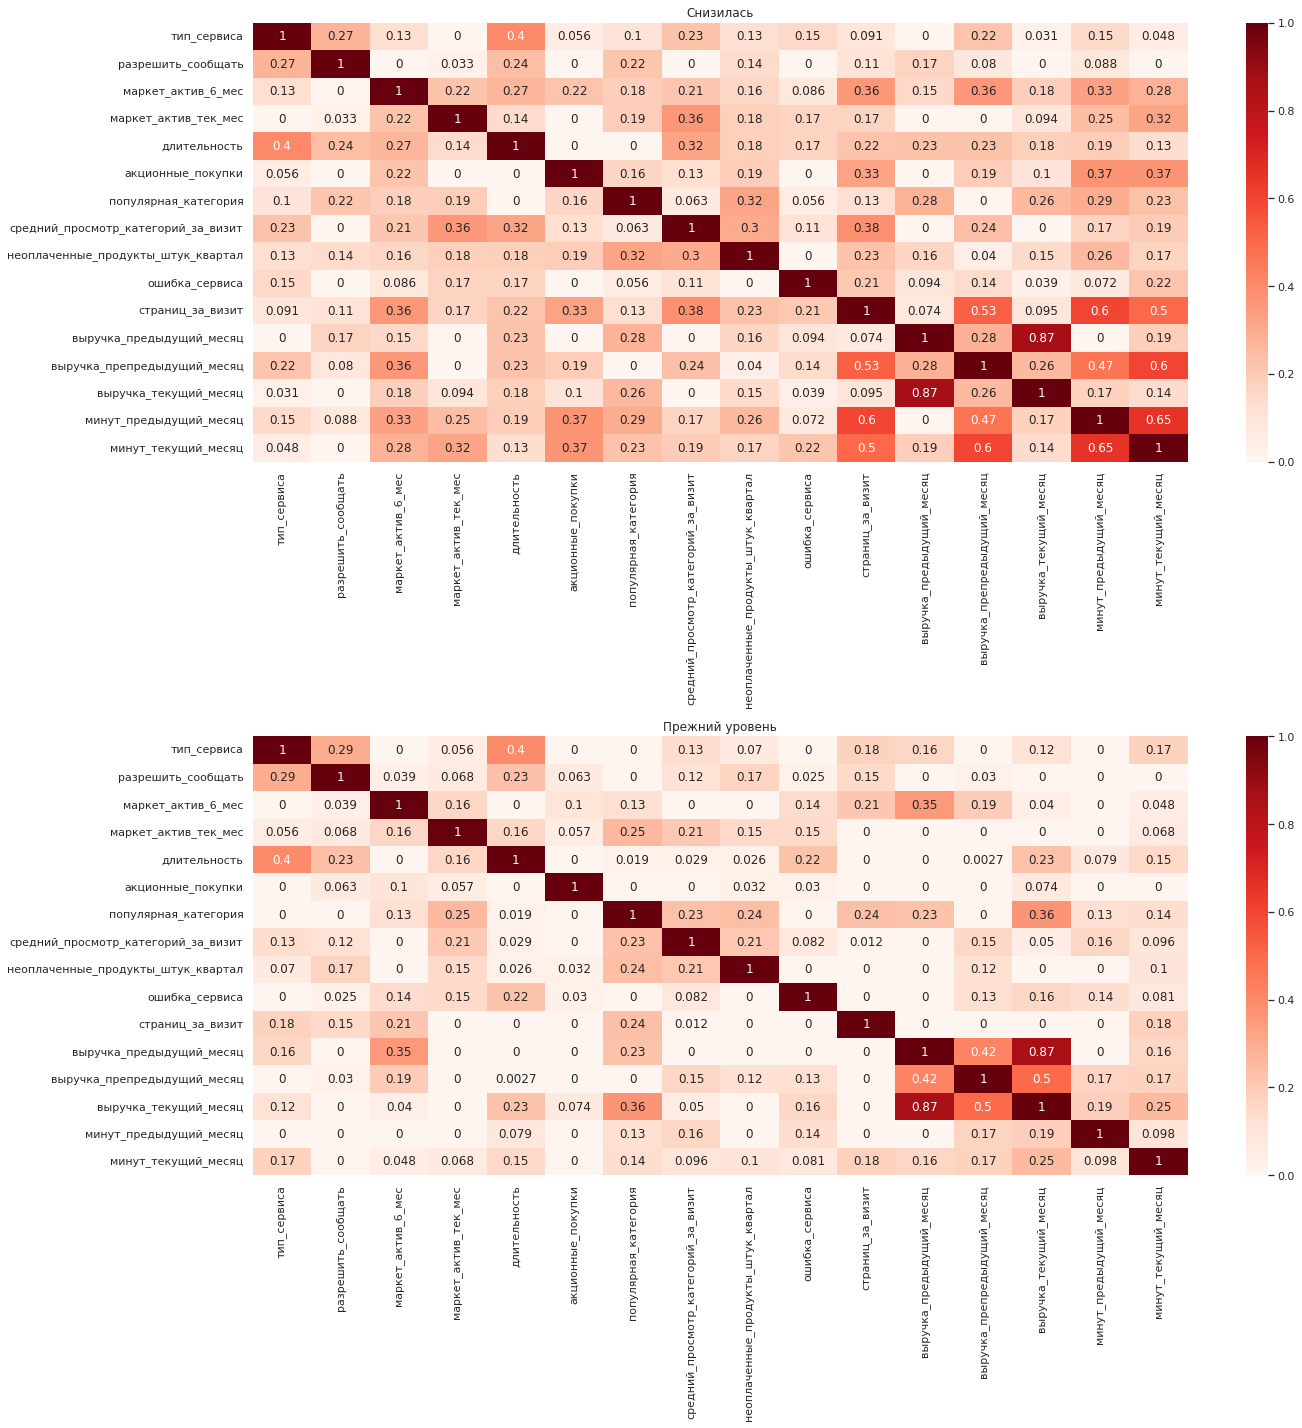

In [60]:
build_phik_corr_matrix(market_full, 'покупательская_активность')

**Вывод по матрице корреляции**:

Для нашего исследования целевым признаком является `Покупательская_активность`. Согласно матрице, значение покупательской активности зависит от следующих переменных:`Маркет_актив_6_мес`, `Акционные_покупки`, `Средний_просмотр_категорий_за_визит`, `Неоплаченные_продукты_штук_квартал`, `Страниц_за_визит`, `Выручка_препредыдущий_месяц`, `минут_предыдущий_месяц`, `минут_текущий_месяц`. 
А также можно отметить сильную корреляцию с признаками: `Выручка_предыдущий_месяц`, `Выручка_текущий_месяц`
Но значение корреляции меньше 0.9, поэтому признаки оставим.


### Использование Пайплайнов

Пайплайн — это инструмент, который позволяет автоматизировать
действия по подготовке данных, обучению моделей и оценке их качества.
Где выход из каждого шага является входом для следующего.

Переберем модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC() используя пайплайны.

Подготовка данных. Целевой признак закодируем. А также по результатам исследовательского анализа данных было решение Акционные_покупки сделать категориальным признаком.

In [61]:
from sklearn.preprocessing import LabelEncoder

Ранее нами была построена гистограмма см [37]. На данной гистограмме видно, как на границе 0.6 видно четкое разделение гистограммы на 2 части - так мы разделим наш признак Акционные покупки. Будет категория, которая часто покупает по акции и редко покупает по акции:

In [62]:
market_full['акционные_покупки_категория'] = market_full['акционные_покупки']\
.apply( lambda x: 'Часто покупает по акции' if x>= 0.6 else 'Редко покупает по акции' )
market_full = market_full.drop(['акционные_покупки'], axis=1)

In [63]:
market_full = market_full.set_index('id')

In [64]:
market_full.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,Часто покупает по акции
215350,Снизилась,стандарт,нет,4.9,3,539,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,Редко покупает по акции
215351,Снизилась,стандарт,да,3.2,5,896,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,Часто покупает по акции
215352,Снизилась,стандарт,нет,5.1,3,1064,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,Часто покупает по акции
215353,Снизилась,стандарт,да,3.3,4,762,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,Редко покупает по акции


In [65]:
# Выделим целевой признак и проведем разделение выборки на тренировочную и тестовую. 
# Константы импортировали ранее, поэтому здесь они не фигурируют

X = market_full.drop(['покупательская_активность'], axis=1)
y = market_full['покупательская_активность']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)


In [66]:
# Создание экземпляра LabelEncoder
le = LabelEncoder()

market_full['покупательская_активность'] = le.fit_transform(market_full['покупательская_активность'])

In [67]:
ohe_columns = [ 'популярная_категория']
ord_columns = ['акционные_покупки_категория', 'разрешить_сообщать', 'тип_сервиса']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'маркет_актив_тек_мес', 
               'длительность', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 
               'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
               'минут_предыдущий_месяц', 'минут_текущий_месяц']

In [68]:
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'маркет_актив_тек_мес', 
               'длительность', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 
               'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
               'минут_предыдущий_месяц', 'минут_текущий_месяц']

In [69]:
# Создание пайплайна для обработки данных с использованием OneHotEncoder
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False))
    ]
)


In [70]:
ord_pipe = Pipeline(
    [
        (
            'simple_imputer_ord_before',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[
                                      ['Редко покупает по акции', 'Часто покупает по акции'],  # акционные_покупки_категория
                                      ['стандарт', 'премиум'],  # тип_сервиса
                                      ['да', 'нет']  # разрешить_сообщать
                          ],
                          handle_unknown='use_encoded_value',
                          unknown_value=np.nan)
        ),
        (
            'simple_imputer_ord_after',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [71]:
ord_pipe = Pipeline(
    [
        (
            'simple_imputer_ord_before',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[
                                      ['Редко покупает по акции', 'Часто покупает по акции'],  # акционные_покупки_категория
                                      ['стандарт', 'премиум'],  # тип_сервиса
                                      ['да', 'нет']  # разрешить_сообщать
                          ],
                          handle_unknown='use_encoded_value',
                          unknown_value=np.nan)
        ),
        (
            'simple_imputer_ord_after',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)


In [72]:
# Создаем трансформер для обработки разных типов данных

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [73]:
# Создаем финальный пайплайн для предобработки данных и обучения модели, будем использовать дерево решений
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [74]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(2,7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]


In [75]:
# Создаем финальный пайплайн для предобработки данных и обучения модели, будем использовать дерево решений
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [76]:
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

Выбор метрики ROC-AUC для оценки модели является хорошим выбором в данном случае, так как:
+ ROC-AUC подходит для задач классификации с неодинаково частыми классами.
+ Это метрика, которая хорошо отражает способность модели различать классы.
+ ROC-AUC устойчиво к выбросам и может быть полезна даже при наличии нетипичных данных.
+ И учитывая, что присутствует дисбаланс, то это не является помехой для данной метрики.

In [77]:
grid.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simple_imputer_ord_before',
                 

In [78]:
y_test_pred_proba = grid.predict_proba(X_test)[:, 1]  # Вероятности для класса 1
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc:.4f}')


Метрика ROC-AUC на тестовой выборке: 0.9183


In [79]:
# Предсказание вероятностей классов
probabilities = grid.predict_proba(X_test)

# Извлечение вероятностей для класса 1
probabilities_one = probabilities[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, probabilities_one)

print(f'Метрика ROC-AUC для модели МО: {roc_auc:.4f}')

Метрика ROC-AUC для модели МО: 0.9183


**Вывод по разработке пайплайна**

На данном шаге исследования была найдена и обучена модель для определения снижения активности покупателей сервиса.

Лучшие результаты показала модель LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear'). 

Несмотря на то, что при исследовании был выявлен дисбаланс у целевого признака, всё же метрика roc_auc для тренировочной выборки показла результат 0.90, для тестовой выборки 0.92, что является хорошим показателем, то есть модель хорошо справляется с предсказанем.
Модель имеет показатель roc-auc = 0,92


### Анализ важности признаков

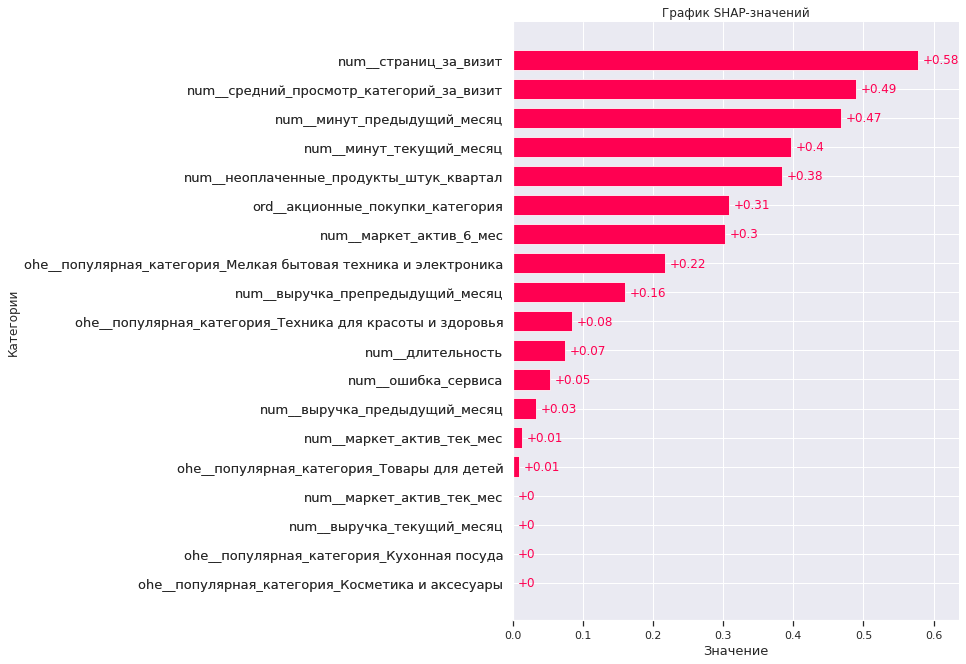

In [80]:

X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.Explainer(grid.best_estimator_.named_steps['models'], X_train_2)
X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)
shap_values = explainer(X_test_2)
shap.plots.bar(shap_values, max_display=30, show=False)


plt.title('График SHAP-значений')
plt.xlabel("Значение")
plt.ylabel("Категории")
plt.show()



In [81]:
#X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
#explainer = shap.Explainer(grid.best_estimator_.named_steps['models'], X_train_2)
#X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)
#feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
#X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)
#shap_values = explainer(X_test_2)
#display(shap.plots.bar(shap_values, max_display=30))

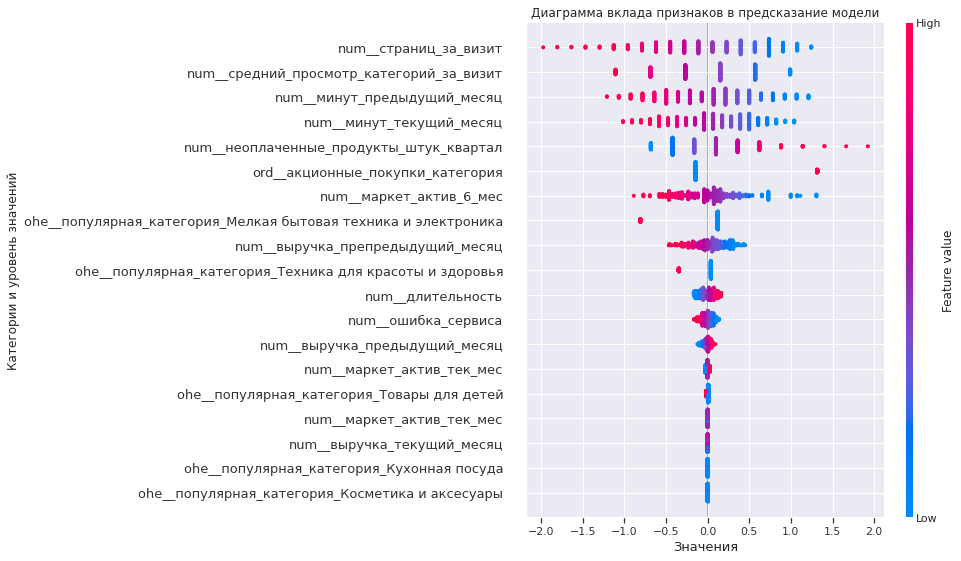

In [82]:
shap.plots.beeswarm(shap_values, max_display=300, show=False)

plt.title('Диаграмма вклада признаков в предсказание модели')
plt.xlabel("Значения")
plt.ylabel("Категории и уровень значений")
plt.show() 

Признаки с положительными значениями SHAP повышают вероятность того, что покупательская активность снизится (класс 1), а признаки с отрицательными значениями - понижают (класс 0).

Выделим Топ-5 из них (num)
 + Страниц за визит
 + Средний просмотр категорий за визит
 + Минут предыдущий месяц
 + Минут текущий месяц
 + Неоплаченные продукты штук квартал
 
 и можем отметить Акционные покупки

Именно эти признаки, согласно проведенному исследованию, больше всего влияют на пользовательскую активность. Действительно, если пользователь проводит много времени при просмотре категорий или листает большое количество страниц за визит, тем более он активным считается на сервисе и скорее всего он целенаправленно настроен что-то приобрести (или решил потратить полученную зарплату:) ), и даже, вероятнее всего, что-то купит.

Малозначимыми признаками оказались:
+ Популярная категория(кроме бытовой техники) 
+ Разрешить сообщать, 
+ Тип_сервиса, 
+ Выручка_текущий_месяц, 
+ Длительность, 
+ Ошибка_сервиса, 
+ Выручка_предыдущий_месяц.

Так как мы исследуем активность, то, перечисленные признаки не особо характеризуют активность пользователя. И в целом модель отработала верно, однако есть такие признаки, как: Тип сервиса (он делится на премиум и стандарт). Обычно премиум приобретают пользователи, активно использующие сервис. Возможно, модель не отнесла это в список значимых признаков, так как премиум пользователей не так много в сравнении со стандартом.

И также Выручка тоже может характеризовать активность пользователя, особенно если он активно что-то покупает. Однако, тут могло сыграть роль, что некоторые пользователи только просматривают, кидают что-то в корзины, но в конечном итоге не покупают, и тогда они может быть и активные, но выручка у них меньше. Тогда в этом плане можно смело согласиться с моделью МО. Но чтобы в этом убедиться, нужно проверить показатель Неоплаченные продукты штук. это то, что пользователь закинул в корзину, но в итоге не приоьрел.

Поэтому, если мы хотим дать какие-то рекомендации бизнесу, как повысить пользовательскую активность - то одна из самых основных - это увеличение ассортимента, адекватное ценообразование. тогда у пользователя будет больше выбора и он больше времени будет проводить на сервисе, больше листать страниц, просматривать категорий (особенно тех, что, например, выделила модель при прогнозе) и среди большого ассортимента есть вероятность, что покупатель что-то выберет.

Устраивать акции, так как все-таки есть процент покупателей, которые мониторят акционные предложения.

Можно добвить напоминалки тем, кто просто добавляет товары в корзину, но по итогу их не оплачивает. 


### Сегментация покупателей


Будем изучать сегмент покупателей, которые мониторят акционные предложения и предпочитают покупать по акции, данный сегмент может быть определен следующим образом:

- **"num_минут_предыдущий_месяц"**:  если мы считаем, что покупателя интересуют только акционные предложения, то он доложен меньше времени проводить на сайте, т.к. например посещает его только когда начинается акция.

- **"num_страниц_за_визит"**: такие покупатели просматривают меньше страниц за визит, что указывает на их фокусировку на конкретных товарах или категориях, скорее всего, акционных.

- **"num_средний_просмотр_категории_за_визит"**: скорее всего, данные покупатели обращаютя на сайт за покупкой чего-то определенного.

- **"num_неоплаченые продукты штука квартал"**: так как их интересует покупка со скидкой, то у них чаще всего может лежать в корзине большое количество товаров и получается, что они ждут акций, чтобы их приобрести.

Хоть таких покупателей и можно считать ценными, так как при наличии действительно выгодных акций, они совершат покупку, но без них их покупательская активность всё-таки может быть ниже, но для того, чтобы задержать их на сервисе, нужно продумывать какие-то новые стратегии.


In [83]:
market_full.columns

Index(['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'популярная_категория', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
       'минут_предыдущий_месяц', 'минут_текущий_месяц',
       'акционные_покупки_категория'],
      dtype='object')

In [84]:
y_test_proba = grid.predict_proba(X_test)[:,1]
y_train_proba = grid.predict_proba(X_train)[:,1]
X_test['вероятность_снижения'] = y_test_proba
X_train['вероятность_снижения'] = y_train_proba
market_full = pd.concat([X_train, X_test])


In [85]:
# объединение данных
market_full = market_full.merge(money, on='id', how='left')

#проверим, не упустились ли какие-либо данные при объединении таблиц

market_full.info()
market_full.head()
market_full.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   популярная_категория                 1296 non-null   object 
 7   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 8   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 9   ошибка_сервиса                       1296 non-null   int64  
 10  страниц_за_визит                     1296 non-null   int64  
 11  выручка_предыдущий_месяц      

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория,вероятность_снижения,прибыль
1291,215429,премиум,нет,0.9,4,690,Домашний текстиль,2,5,7,4,3662.0,4488.0,4158.6,11,10,Редко покупает по акции,0.960917,3.71
1292,216233,премиум,да,3.9,4,1048,Техника для красоты и здоровья,3,0,6,14,4325.0,4553.0,4257.4,15,17,Редко покупает по акции,0.051071,4.62
1293,215716,стандарт,да,2.4,4,952,Техника для красоты и здоровья,3,5,2,3,3067.0,4165.0,3343.9,13,14,Редко покупает по акции,0.844891,4.07
1294,216141,стандарт,нет,4.0,4,748,Косметика и аксесуары,4,0,4,9,5660.5,4885.0,6462.6,14,10,Редко покупает по акции,0.195340,1.97
1295,215670,стандарт,да,4.1,4,490,Кухонная посуда,3,7,3,2,5415.0,4563.0,5723.1,9,11,Часто покупает по акции,0.984722,4.27


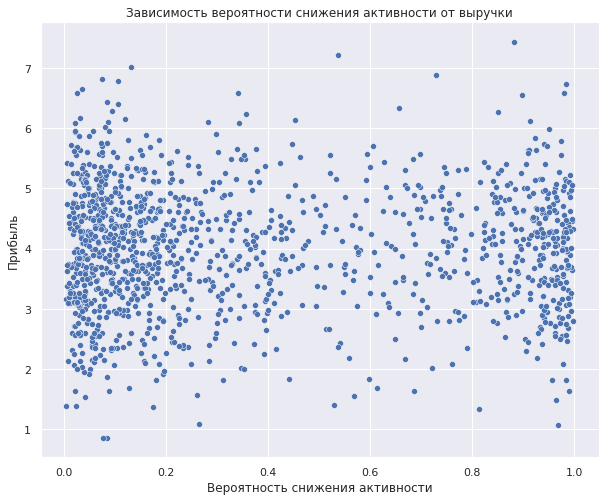

In [86]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(market_full, y='прибыль', x='вероятность_снижения')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

Получили диаграмму рассеянья Прибыли и Вероятности снижения активности покупателя. Зависимость между ними не наблюдается.

In [87]:
def build_scatterplots(cat_columns):
    for cat_col in cat_columns:
        fig = plt.figure(figsize=(10,8))
        sns.scatterplot(data=market_full, y='прибыль', x='вероятность_снижения', hue=cat_col)
        plt.xlabel('Вероятность снижения активности')
        plt.ylabel('Прибыль')
        plt.title('Зависимость вероятности снижения активности от выручки')
        plt.show()

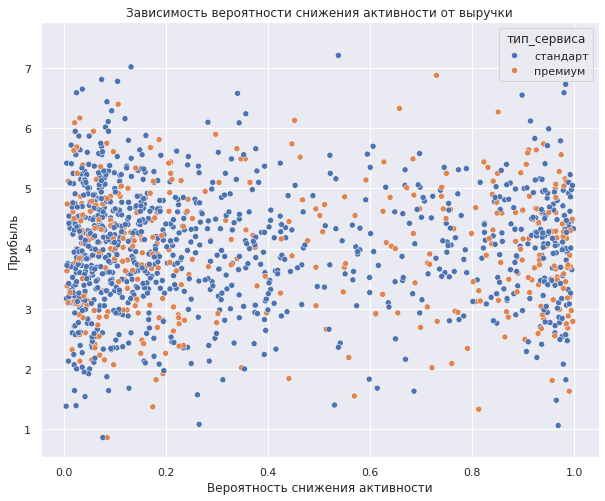

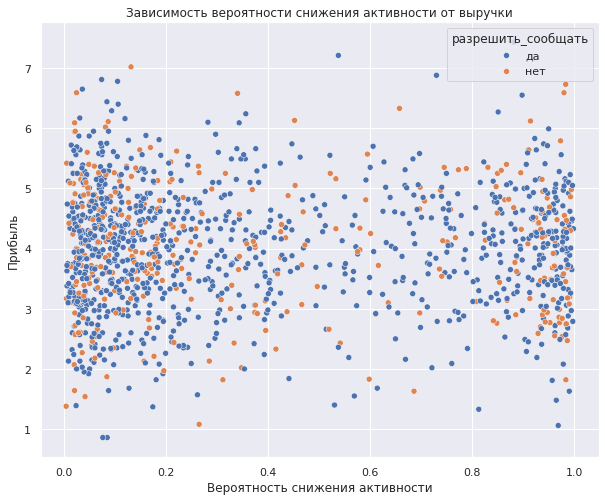

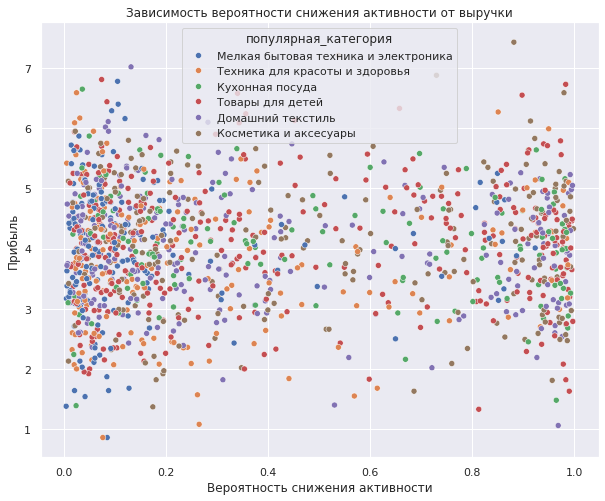

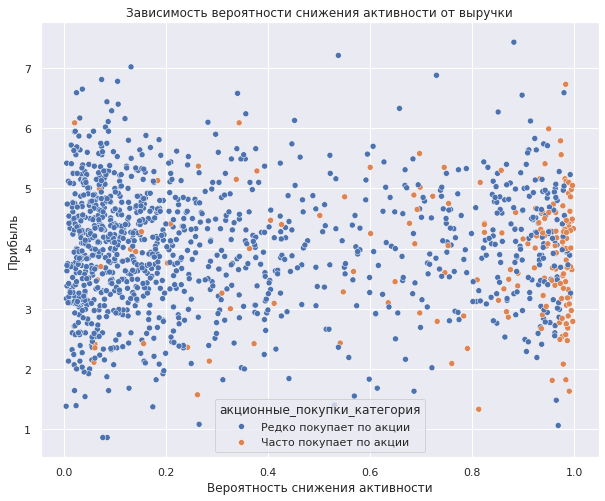

In [88]:
cat_columns = list(market_full.select_dtypes(include='object').columns)
build_scatterplots(cat_columns)

Согласно построенному графику, изучим показатель акционные_покупки_категория. Пользователи, которые часто покупают по скидке чаще всего имеют высокую вероятность снижения активности. Это можно объяснить тем, что акции на сервисе проводятся не всегда и покупатели посещают сайт периодами, чтобы купить что-то по скидке. 



Также будем сегментировать в зависимости от прибыли. Если посмотреть на скаттер плот, то при вероятности снижения больше 0.8, то для этого значения диапазон выручки варьирует от 1 до 7, предлагаю взять диапазон, в котором больше всего скапливается значений - это от 2 до 5. Учтем это при формировании сегмента

In [89]:
filtered_data = market_full[market_full['вероятность_снижения'] > 0.8]
min_revenue = filtered_data['прибыль'].min()
max_revenue = filtered_data['прибыль'].max()

print(f"Минимальная прибыль: {min_revenue}")
print(f"Максимальная прибыль: {max_revenue}")

Минимальная прибыль: 1.06
Максимальная прибыль: 7.43


In [90]:
promo_lovers = market_full[
    (market_full['вероятность_снижения'] > 0.8) &
    (market_full['акционные_покупки_категория'] == 'Часто покупает по акции') &
    (market_full['прибыль'] >= 2) & 
    (market_full['прибыль'] <= 5)     
]

# Создаем сегмент other, вычитая promo_lovers из market_full
other_customers = market_full.drop(promo_lovers.index)

print(f'Создан сегмент "promo_lovers" с {len(promo_lovers)} покупателями.')
print(f'Создан сегмент "other" с {len(other_customers)} покупателями.')

Создан сегмент "promo_lovers" с 97 покупателями.
Создан сегмент "other" с 1199 покупателями.


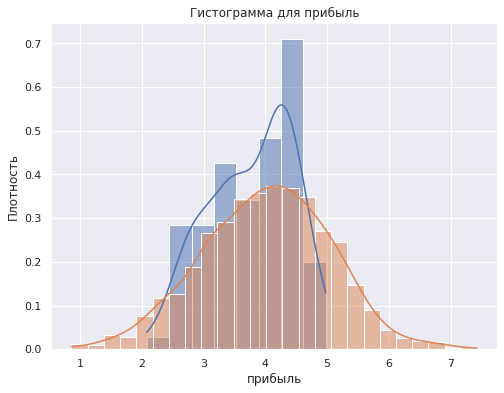

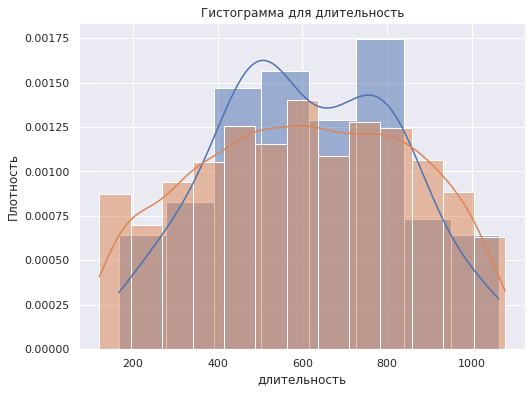

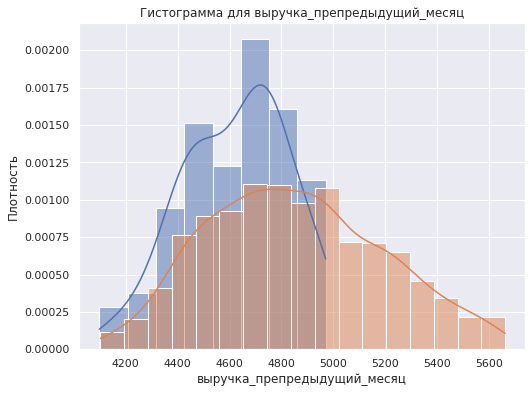

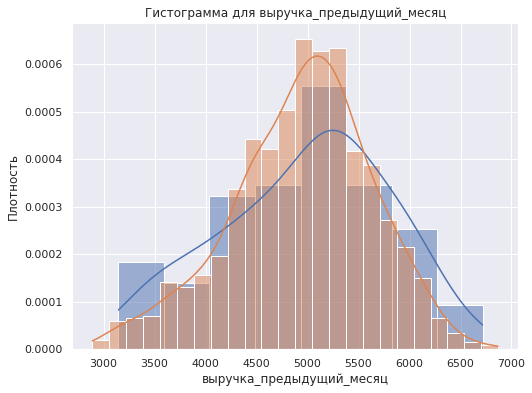

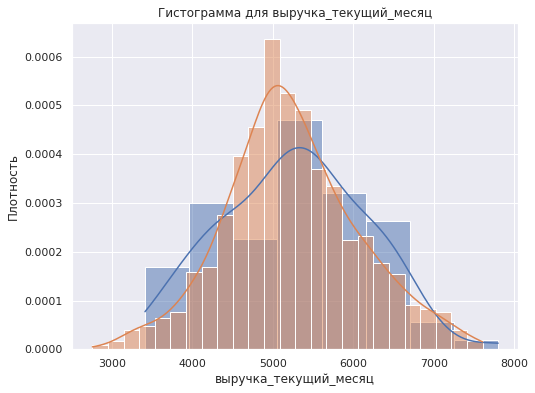

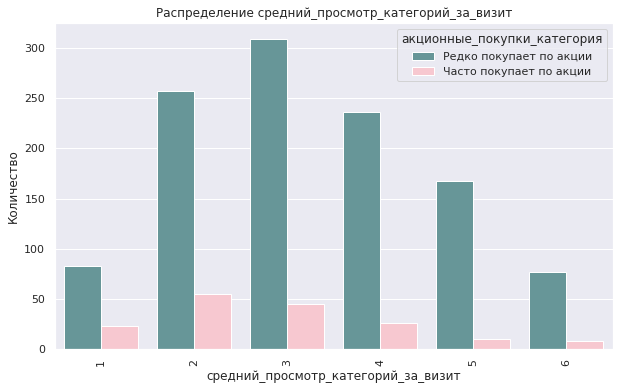

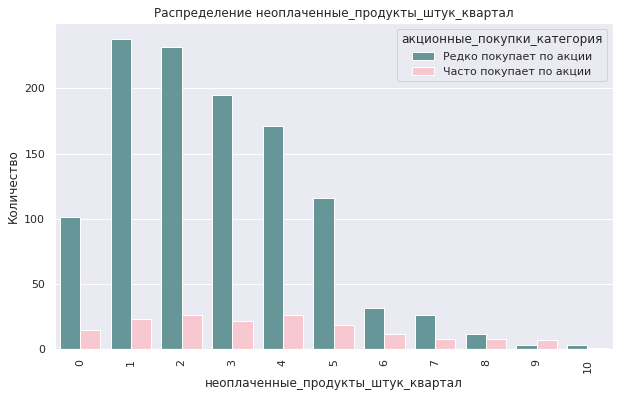

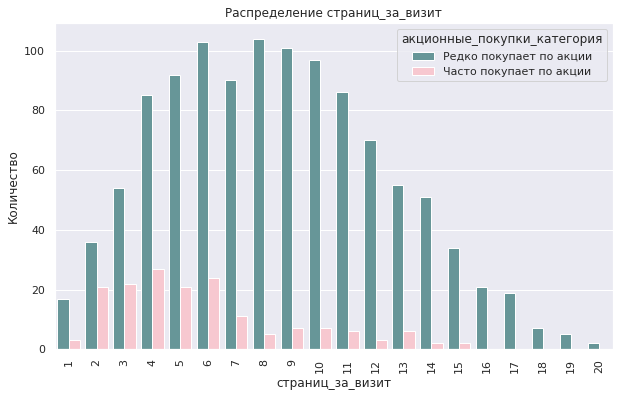

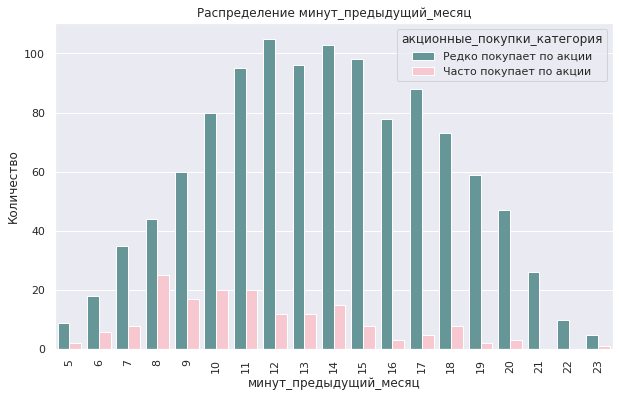

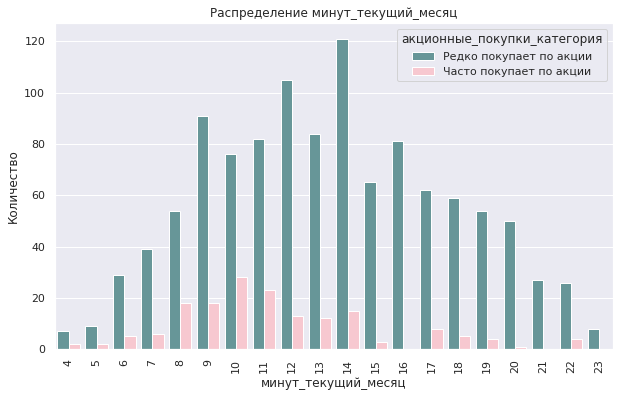

In [91]:
# Анализ покупательской активности
activity_col = (['прибыль', 'популярная_категория', 'длительность', 
                     'средний_просмотр_категорий_за_визит', 
                     'неоплаченные_продукты_штук_квартал', 'страниц_за_визит', 
                     'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 
                     'выручка_текущий_месяц', 'минут_предыдущий_месяц', 
                     'минут_текущий_месяц', 'разрешить_сообщать']
                   )
activity = promo_lovers[activity_col]

# Разделяем признаки на дискретные и непрерывные
continuous_cols = ['прибыль', 'длительность', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 
                   'выручка_текущий_месяц']

discrete_cols = ['средний_просмотр_категорий_за_визит','неоплаченные_продукты_штук_квартал', 'страниц_за_визит', 'минут_предыдущий_месяц', 
                'минут_текущий_месяц']

for col in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(promo_lovers[col], stat='density', common_norm=False, kde=True)
    sns.histplot(other_customers[col], stat='density', common_norm=False, kde=True)
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.show()
    
    
    
# строим countplot для дискретных признаков
for column in discrete_cols:
    plt.figure(figsize=(10, 6))
    
    # Countplot с hue
    sns.countplot(data=market_full, x=column, hue='акционные_покупки_категория', palette=['cadetblue', 'pink'])
    
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.xticks(rotation='vertical')  # Поворот для категорий, если нужно
    plt.show()



In [92]:
# Добавим общие столбцы
promo_lovers['общая_выручка_3_месяца'] = \
promo_lovers[['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']].sum(axis=1)
other_customers['общая_выручка_3_месяца'] = \
other_customers[['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']].sum(axis=1)

promo_lovers['общие_минуты_2_месяца'] = promo_lovers[['минут_предыдущий_месяц', 'минут_текущий_месяц']].sum(axis=1)
other_customers['общие_минуты_2_месяца'] = other_customers[['минут_предыдущий_месяц', 'минут_текущий_месяц']].sum(axis=1)

# Обновление списка столбцов 
activity_col += ['общая_выручка_3_месяца', 'общие_минуты_2_месяца']

# Создаем пустой DataFrame, куда сохраним следующие результаты:
compare = pd.DataFrame()

# Проходим по каждому столбцу в данных
for column in activity_col:
    # Если тип данных столбца - object, то это категориальные данные
    if promo_lovers[column].dtype == 'object':
        compare.loc['Мода (Предпочитающие акции)', column] = promo_lovers[column].mode()[0]
        compare.loc['Мода (Остальные покупатели)', column] = other_customers[column].mode()[0]
    else:
        # Иначе это числовые данные
        compare.loc['Медиана (Предпочитающие акции)', column] = promo_lovers[column].median()
        compare.loc['Медиана (Остальные покупатели)', column] = other_customers[column].median()

# Транспонирование таблицы для удобства просмотра и вывод ее
display(compare.transpose())


,Медиана (Предпочитающие акции),Медиана (Остальные покупатели),Мода (Предпочитающие акции),Мода (Остальные покупатели)
прибыль,3.93,4.06,NaN,NaN
популярная_категория,NaN,NaN,Товары для детей,Товары для детей
длительность,582.0,607.0,NaN,NaN
средний_просмотр_категорий_за_визит,2.0,3.0,NaN,NaN
неоплаченные_продукты_штук_квартал,4.0,2.0,NaN,NaN
страниц_за_визит,4.0,8.0,NaN,NaN
выручка_препредыдущий_месяц,4656.0,4833.0,NaN,NaN
выручка_предыдущий_месяц,5159.0,4999.0,NaN,NaN
выручка_текущий_месяц,5293.2,5175.6,NaN,NaN
минут_предыдущий_месяц,10.0,14.0,NaN,NaN


На основе представленных данных, можно сделать следующие выводы:

По числовым признакам:
+ Показатели прибыли примерно одинаковые у пользователей, покупающих в акционные дни и у остальных покупателей (3,93 и 4,06)

+ По длительности посещения сайта покупатели, которые предпочитают акции, сидят немного меньше, можно объяснить тем, что их интересуют именно акционные периоды  (582 и 607)

+ Средний просмотр категорий за визит у тех, кто покупает по акции меньше, чем у остальных покупателей. Это можно объяснить тем, что 1 категория скорее всего целенаправленно ищет что-либо на сайте с целью купить, а 2 категория просто может просматривать всё, что имеется в каталоге (**Сюда же можно отнести страниц за визит**, **минут предыдущий месяц**, **минут текущий месяц** - скорее всего, здесь такой же принцип)

+ Неоплаченные продукты штук квартал: 1 категория 4, 2 категория 2 - можно объяснить тем, что у 1 категории чуть более низкая покупательная способность, поэтому они больше закидывают что-то в корзину и могут ждать снижения цены, в то время как 2 категория скорее всего сразу купит, что хочет

+ По показателям выручки обе категории идут примерно на равных, разве что люди, покупающие по акции имеют показатели чуть выше, возможно, раз они редко отслеживают акции, то применяют это для более глобальных приобретений) 

По категориальным признакам:
 - для обеих категорий популярными товарами являются товары для детей. возможно, в основном пользователи это мамы в декрете
 - и обе категории разрешают уведомления как правило, а значит при правильной работе системы оповещений мы можем повышать пользовательскую активность
 


Исходя из имеющихся данных и специфики сегмента - покупающие по акции- можно предложить следующие методы повышения пользовательской активности и покупательной способности данного сегмента:

- конечно же, увеличение количества акций: различные акции, скидки, эксклюзивные промокоды точно увеличат их активность на сервисе

- так как эти пользователи проводят меньше времени на сайте, согласно имеющимся данным, то нужно примерно понимать, что интересует пользователя и настроить систему рекомендаций, чтобы пользователь не тратил много времени на поиск необходимого товара, всё должно быть оптимизировано и быстро искаться

- усовершенствовать систему оповещений, уведомлений, чтобы пользователь вовремя был уведомлен об акциях, а также присылать напоминания о том, что в корзине залежался товар



### Общий вывод

Перед нами стояла цель **разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность**. 

В результате знакомства с данными было обработано 4 датасета: 
+ market_file - данные о поведении покупателя на сайте
+ market_money - данные о выручке, которую получают с покупателей
+ market_time - данные о времени в минутах, которое покупатель провел на сайте
+ money - данные о среднемесячной прибыли за 3 месяца

**---**

В результате изучения данных были проверены пропуски в датасетах, предварительно изучилась описательная статистика.
Все столбцы соответствовали описанным в проекте данным, в результате изучения данных пропусков в датасетах не было. Названия столбцов в датасетах содержали пробелы и начинали с заглавных букв, было принято решение определить функцию, которая будет приводить названия столбцов к змеиному регистру. И их приняли решение оставить на кириллице.

В датасете market_file были столбцы, имеющие неверный тип данных.

А в датасете market_money в результате описательной статистики были обнаружены аномальные значения, пока решили изучить их на последующих этапах.

Также была определена функция, которая привела к верному типу данных.


**---**

Далее в процессе было изучение наличие явных и неявных дубликатов. Во всех датасетах явные дубликаты отсутствуют. В процессе проверки неявных дубликатов были выявлены опечатки, которые были исправлены.

Опечатки были в столбце "Период" - предыдцщий исправили на предыдущий
            
			В столбце "Тип сервиса" -стандартт был исправлен на стандарт (получился неявный дубликат)

Также были проверены неявные пропуски тоже, они также отсутствуют.



**---**

Провели исследовательский анализ данных, больше было визуальное изучение.
Определили функции, которые строили гистограммы и график ящик с усами для разных столбцов датасета market_file.

Можно отметить, что при исследовании столбца пользовательская активность было замечено, что имеется дисбаланс значений целевого признака. Прежний уровень преобладает над значением снизилась. Это может привести к тому, что обученная модель может ошибочно из-за такой статистики присвоить "Прежний уровень", там где должен быть "Снизилась", будут смещаться метрики.

Видим, что премиум пользователей меньше, что обычно и наблюдается.

При изучении столбца акционные покупки, можно было сделать вывод, что для большинства покупателей не совсем принципиально покупать что-то в акционные дни. Но тем не менее есть часть покупателей, которые отслеживают акционные дни и приобретают товары по скидке (наталиквает на то, что по данному признаку их можно сегментировать). Между этими столбцами на гистограмме есть промежуток, что может нас натолкнуть на то, что нужно разделить покупателей по этому принципу - создать категориальный признак - акционные покупки при подготовке модели.
У большинства столбцов нет выбросов. Можно сопоставить результаты просмотра гистограмм с описательной статистикой, проводимой на предыдущем этапе.

Однако при изучении выручки было обнаружно аномальное значение, которое мы предварительно выявили при описательной статистике. Сейчас изучили его более наглядно.Данное значение было принято рещение удалить, поскольку оно могло повлиять на корректность анализа данных. Это может быть следствием человеческого фактора или иных ошибок. В любом случае, если не обработать эти значения должным образом, они могут снизить точность модели.

У нас имеются пользователи, которые ничего не покупали и не проявляли активности на сервисе. Избавились от данных строк датасета тоже, так как мы изучаем пользовательскую активность.


**---** 

Отобрали клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.
Из 1300 пользователей, 1296 подходили под наши параметры.


**---** 

Произвели объединение данных из датасетов market_file, market_money, market_time в одну таблицу по столбцу id, так как они уникальный и присутствует во всех этих датасетах. И получается, в каждой из таблиц есть данные для конкретного id, на этом основании проведем объединение. Чтобы все необходимые для дальнейшей работы характеристики были в одном датасете.
Также построили матрицу корреляции для целевого признака, чтобы более наглядно изучить. Для этого определили функцию.


**---** 

Для нашего исследования целевым признаком является Покупательская_активность. Согласно матрице, значение покупательской активности зависит от следующих переменных:Маркет_актив_6_мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Выручка_препредыдущий_месяц, минут_предыдущий_месяц, минут_текущий_месяц. А также можно отметить сильную корреляцию с признаками: Выручка_предыдущий_месяц, Выручка_текущий_месяц Но значение корреляции меньше 0.9, поэтому признаки оставим.


**---**  

Используя пайплайны, выбрали лучшую модель машинного обучения.
Пайплайн — это инструмент, который позволяет автоматизировать действия по подготовке данных, обучению моделей и оценке их качества. Где выход из каждого шага является входом для следующего.


**---** 

Перебирали модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC() используя пайплайны.
 
Подготовили данные, целевой признак закодировали. А также по результатам исследовательского анализа данных было решение Акционные_покупки сделать категориальным признаком.

Лучшие результаты показала модель LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear').

Несмотря на то, что при исследовании был выявлен дисбаланс у целевого признака, всё же метрика roc_auc для тренировочной выборки показла результат 0.90, для тестовой выборки 0.92, что является хорошим показателем, то есть модель хорошо справляется с предсказанем.


**---**

Провели Анализ значимости признаков, используя библиотеку Shap.
Признаки с положительными значениями SHAP повышают вероятность того, что покупательская активность снизится (класс 1), а признаки с отрицательными значениями - понижают (класс 0).

Выделили Топ-5 из них (num)

+ Страниц за визит

+ Средний просмотр категорий за визит

+ Минут предыдущий месяц

+ Минут текущий месяц

+ Неоплаченные продукты штук квартал

и можем отметить Акционные покупки

Именно эти признаки, согласно проведенному исследованию, больше всего влияют на пользовательскую активность. 

Малозначимыми признаками оказались:

Популярная категория(кроме бытовой техники)
Разрешить сообщать,
Тип_сервиса,
Выручка_текущий_месяц,
Длительность,
Ошибка_сервиса,
Выручка_предыдущий_месяц.
Так как мы исследуем активность, то, перечисленные признаки не особо характеризуют активность пользователя. И в целом модель отработала верно, однако есть такие признаки, как: Тип сервиса (он делится на премиум и стандарт). Обычно премиум приобретают пользователи, активно использующие сервис. Возможно, модель не отнесла это в список значимых признаков, так как премиум пользователей не так много в сравнении со стандартом.

И также Выручка тоже может характеризовать активность пользователя, особенно если он активно что-то покупает. Однако, тут могло сыграть роль, что некоторые пользователи только просматривают, кидают что-то в корзины, но в конечном итоге не покупают, и тогда они может быть и активные, но выручка у них меньше. Тогда в этом плане можно смело согласиться с моделью МО. Но чтобы в этом убедиться, нужно проверить показатель Неоплаченные продукты штук. это то, что пользователь закинул в корзину, но в итоге не приобрел.

Поэтому, если мы хотим дать какие-то рекомендации бизнесу, как повысить пользовательскую активность - то одна из самых основных - это увеличение ассортимента, адекватное ценообразование. тогда у пользователя будет больше выбора и он больше времени будет проводить на сервисе, больше листать страниц, просматривать категорий (особенно тех, что, например, выделила модель при прогнозе) и среди большого ассортимента есть вероятность, что покупатель что-то выберет.

Устраивать акции, так как все-таки есть процент покупателей, которые мониторят акционные предложения.

Можно добвить напоминалки тем, кто просто добавляет товары в корзину, но по итогу их не оплачивает.


**---** 

Изучили сегмент покупателей, которые мониторят акционные предложения и предпочитают покупать по акции, данный сегмент может быть определен следующим образом:


"num_минут_предыдущий_месяц": если мы считаем, что покупателя интересуют только акционные предложения, то он доложен меньше времени проводить на сайте, т.к. например посещает его только когда начинается акция.

"num_страниц_за_визит": такие покупатели просматривают меньше страниц за визит, что указывает на их фокусировку на конкретных товарах или категориях, скорее всего, акционных.

"num_средний_просмотр_категории_за_визит": скорее всего, данные покупатели обращаютя на сайт за покупкой чего-то определенного.

"num_неоплаченые продукты штука квартал": так как их интересует покупка со скидкой, то у них чаще всего может лежать в корзине большое количество товаров и получается, что они ждут акций, чтобы их приобрести.

Хоть таких покупателей и можно считать ценными, так как при наличии действительно выгодных акций, они совершат покупку, но без них их покупательская активность всё-таки может быть ниже, но для того, чтобы задержать их на сервисе, нужно продумывать какие-то новые стратегии.
На основе представленных данных, можно сделать следующие выводы:

По числовым признакам:
+ Показатели прибыли примерно одинаковые у пользователей, покупающих в акционные дни и у остальных покупателей (3,93 и 4,06)

+ По длительности посещения сайта покупатели, которые предпочитают акции, сидят немного меньше, можно объяснить тем, что их интересуют именно акционные периоды  (582 и 607)

+ Средний просмотр категорий за визит у тех, кто покупает по акции меньше, чем у остальных покупателей. Это можно объяснить тем, что 1 категория скорее всего целенаправленно ищет что-либо на сайте с целью купить, а 2 категория просто может просматривать всё, что имеется в каталоге (**Сюда же можно отнести страниц за визит**, **минут предыдущий месяц**, **минут текущий месяц** - скорее всего, здесь такой же принцип)

+ Неоплаченные продукты штук квартал: 1 категория 4, 2 категория 2 - можно объяснить тем, что у 1 категории чуть более низкая покупательная способность, поэтому они больше закидывают что-то в корзину и могут ждать снижения цены, в то время как 2 категория скорее всего сразу купит, что хочет

+ По показателям выручки обе категории идут примерно на равных, разве что люди, покупающие по акции имеют показатели чуть выше, возможно, раз они редко отслеживают акции, то применяют это для более глобальных приобретений) 

По категориальным признакам:
 - для обеих категорий популярными товарами являются товары для детей. возможно, в основном пользователи это мамы в декрете
 - и обе категории разрешают уведомления как правило, а значит при правильной работе системы оповещений мы можем повышать пользовательскую активность
 


Исходя из имеющихся данных и специфики сегмента - покупающие по акции- можно предложить следующие методы повышения пользовательской активности и покупательной способности данного сегмента:

- конечно же, увеличение количества акций: различные акции, скидки, эксклюзивные промокоды точно увеличат их активность на сервисе

- так как эти пользователи проводят меньше времени на сайте, согласно имеющимся данным, то нужно примерно понимать, что интересует пользователя и настроить систему рекомендаций, чтобы пользователь не тратил много времени на поиск необходимого товара, всё должно быть оптимизировано и быстро искаться

- усовершенствовать систему оповещений, уведомлений, чтобы пользователь вовремя был уведомлен об акциях, а также присылать напоминания о том, что в корзине залежался товар
